# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Нужно подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

Импортируем библиотеки, необходимые для исследования.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import numpy as np
import geopandas as gpd
%matplotlib inline

Нам предстоит работать с большим объемом данных. Чтобы все нужные колонки и строки выводились на экран без многоточий, настроим формат вывода таблиц.

In [2]:
#сброс ограничений на количество выводимых строк
pd.set_option('display.max_rows', None)
#сброс ограничений на количество выводимых столбцов
pd.set_option('display.max_columns', None)
#сброс ограничений на ширину столбца
pd.set_option('max_colwidth', None)

## Изучение данных из файла

###  Чтение файла в переменную и вывод данных на экран

Считаем файл `rest_data.csv` в переменную `df`. 

In [3]:
#чтение файла в переменную df
#прописан путь для работы в практикуме
try:
    df = pd.read_csv('/datasets/rest_data.csv')
#прописан путь для локальной работы в windows
except:
    df = pd.read_csv('datasets/rest_data.csv')

Составим первое представление о данных из файла. Выведем на экран 10 первых и 5 последних строк таблицы.

In [4]:
# получение первых 10 строк таблицы df
display(df.head(10))
# получение последних 5 строк таблицы df
df.tail()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


,id,object_name,chain,object_type,address,number
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


### Общие данные о таблице

Получим общие данные о таблице `df`.

In [5]:
#получение данных о таблице df методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице `df` 6 колонок и 15366 строк.<br>
Согласно документации к данным и информации о таблице, полученной функцией info():
* `id` — идентификатор объекта, тип данных — `int64`;
* `object_name` — название объекта общественного питания, тип данных — `object`;
* `chain` — сетевой ресторан, тип данных — `object`;
* `object_type` — тип объекта общественного питания, тип данных — `object`;
* `address` — адрес, тип данных — `object`;
* `number` — количество посадочных мест, тип данных — `int64`.

### Заключение

В нашем распоряжении таблица с данными о заведениях общественного питания в Москве. Предварительно можно утверждать, что, данных достаточно для анализа. Преступим к предобработке данных.

## Предобработка данных

### Явные дубликаты

Проверим данные на наличие явных дубликатов.

In [6]:
# подсчёт количества дубликатов
df.duplicated().sum()

0

Явных дубликатов нет. Но возможно в данные могли попасть одинаковые строки с разными id. Такое могло произойти, например, если информация собиралась из нескольких разных реестров. Проверим это.

In [7]:
# подсчёт количества дубликатов
df[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

Нашлось 82 дубликата. Выведем на экран один из примеров дубликатов.

In [8]:
dupl = df[df[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]
dupl = dupl.reset_index(drop=True)
df[((df['object_name'] == dupl.loc[0,'object_name'])&
    (df['chain'] == dupl.loc[0,'chain'])&
    (df['object_type'] == dupl.loc[0,'object_type'])&
    (df['address'] == dupl.loc[0,'address'])&
    (df['number'] == dupl.loc[0,'number']))]

,id,object_name,chain,object_type,address,number
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100


Мы видим 2 одинаковых объекта питания с разными id. Удалим дубликаты.

In [9]:
df = df.set_index('id')
df.drop(labels = dupl['id'],axis = 0, inplace = True)
df = df.reset_index(drop=False)
df[((df['object_name'] == dupl.loc[0,'object_name'])&
    (df['chain'] == dupl.loc[0,'chain'])&
    (df['object_type'] == dupl.loc[0,'object_type'])&
    (df['address'] == dupl.loc[0,'address'])&
    (df['number'] == dupl.loc[0,'number']))]

,id,object_name,chain,object_type,address,number
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100


Все дубликаты удалены.

### Изучение данных с целью выявления аномалий

Изучим данные в каждой из колонок с целью поиска и обработки аномалий.

#### id

`id` — идентификатор объекта, тип данных — `int64`. Выведем на экран минимальное и максимальное значение, а также проверим, что `id` уникален.

In [10]:
print('Минимальное значение id:', df['id'].min())
print('Максимальное значение id:', df['id'].max())
print('Количество повторяющихся id:', df['id'].duplicated().sum())

Минимальное значение id: 838
Максимальное значение id: 223439
Количество повторяющихся id: 0


Данные в колонке `id` в порядке.

#### object_name

`object_name` — название объекта общественного питания, тип данных — `object`. В этой колонке значения могут быть любыми, в том числе повторяющимися.

#### chain

`chain` — сетевой ресторан, тип данных — `object`. В этом столбце должны быть только значения `да` и `нет`. Проверим так ли это. Выведем на экран список уникальных значений столбца.

In [11]:
print(df['chain'].unique())

['нет' 'да']


Данные в столбце `chain` в порядке.

#### object_type

`object_type` — тип объекта общественного питания, тип данных — `object`. Выведем на экран список уникальных значений столбца.

In [12]:
print(df['object_type'].unique())

['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


Данные в столбце `object_type` в порядке.

#### address

`address` — адрес, тип данных — `object`. Адрес может быть любым, но должен быть корректным и находится в Москве. Адресов слишком много, чтобы со всеми ознакомится. Выведем на экран несколько адресов для ознакомления.

In [13]:
print(sorted(df['address'].unique())[0:4])

['1-й Нагатинский проезд, дом 10', '1-я Тверская-Ямская улица, дом 29/66, корпус 1', '2-я Брестская улица, дом 1, строение 1', '2-я Брестская улица, дом 5, строение 1']


#### number

`number` — количество посадочных мест, тип данных — `int64`. Выведем на экран минимальное и максимальное значение.

In [14]:
print('Минимальное значение number:', df['number'].min())
print('Максимальное значение number:', df['number'].max())

Минимальное значение number: 0
Максимальное значение number: 1700


1700 посадочных мест - кажется очень большим числом. Проверим не является ли значение выбросом. Выведем список уникальных значений.

In [15]:
print(sorted(df['number'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 172, 173, 174, 175, 176, 177, 178, 180, 181, 184, 185, 186, 187, 188, 189, 190, 192, 194, 195, 196, 198, 199, 200, 202, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 220, 222, 224, 225, 226, 228, 229, 230, 232, 234, 236, 237, 238, 239, 240, 242, 243, 244, 245,

Построим ящик с усами.

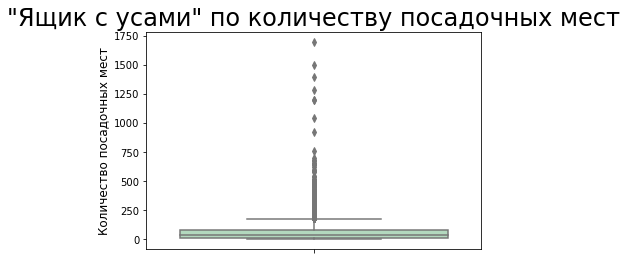

In [16]:
fig, ax = plt.subplots()
sns.set_palette('GnBu_d', 30)
sns.boxplot(ax=ax, y=df['number'] )
ax.set_ylabel('Количество посадочных мест' , size = 12 )
ax.set_title('"Ящик с усами" по количеству посадочных мест', size = 24 )
plt.show()

В большей части заведений посадочных мест меньше 200. Выведем на экран заведения с наибольшим количеством посадочных мест.

In [17]:
df.sort_values(by='number', ascending=False).head()

,id,object_name,chain,object_type,address,number
12675,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700
8122,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
8319,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9036,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
3684,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200


Судя по заведениям, количество посадочных мест указано верно.

#### Заключение

Данные готовы к анализу.

### Анализ данных

#### Cоотношение видов объектов общественного питания по количеству

Посчитаем сколько объектов каждого из типов объектов общественного питания.

In [18]:
#групировка df по object_type с полсчетом количества
object_type_pivot = df.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
object_type_pivot.rename(columns={'id': 'quantity'}, inplace=True)
#подсчет процентов
object_type_pivot['persent'] = object_type_pivot['quantity'] / object_type_pivot['quantity'].sum() * 100
#форматирование процента
object_type_pivot['persent'] = object_type_pivot['persent'].map(lambda x : str(round(x, 2)) + ' %')
object_type_pivot

,object_type,quantity,persent
0,кафе,6071,39.72 %
1,столовая,2584,16.91 %
2,ресторан,2282,14.93 %
3,предприятие быстрого обслуживания,1898,12.42 %
4,бар,855,5.59 %
5,буфет,577,3.78 %
6,кафетерий,395,2.58 %
7,закусочная,349,2.28 %
8,магазин (отдел кулинарии),273,1.79 %


Построим диаграмму.

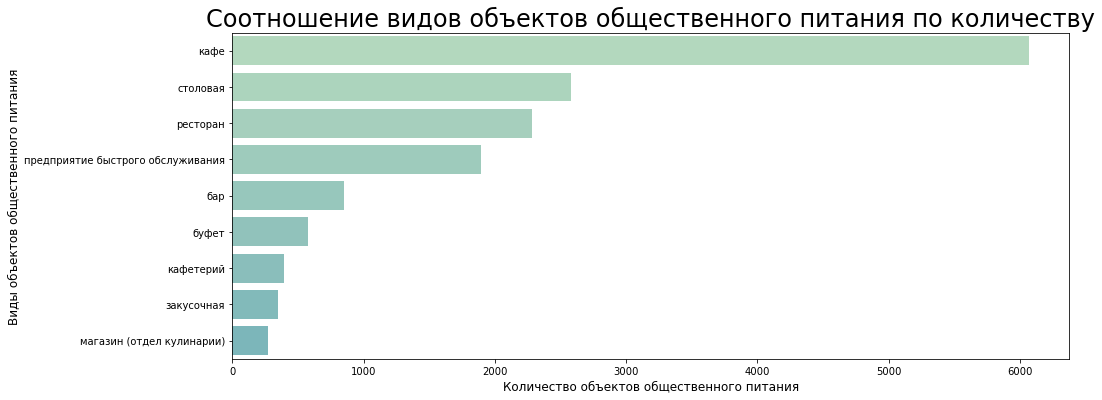

In [19]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.set_palette('GnBu_d', 30)
sns.barplot(ax = ax, x = 'quantity', y = 'object_type', data = object_type_pivot)
ax.set_xlabel('Количество объектов общественного питания', size = 12 )
ax.set_ylabel('Виды объектов общественного питания' , size = 12 )
ax.set_title('Соотношение видов объектов общественного питания по количеству', size = 24 )
plt.show()

Количество кафе сильно превышает количество остальных заведений. Также в Москве много столовых, ресторанов, предприятий быстрого обслуживания. Меньше всего магазинов с отделами кулинарии, закусочных и кафетериев.

#### Cоотношение сетевых и несетевых заведений по количеству

Посчитаем сколько в Москве сетевых и несетевых заведений.

In [20]:
#групировка по признаку сетевой, подсчет количества
chain_pivot = df.groupby('chain')['id'].count().sort_values(ascending=False).reset_index()
chain_pivot.rename(columns={'id': 'quantity'}, inplace=True)
#подсчет процента
chain_pivot['persent'] = chain_pivot['quantity'] / chain_pivot['quantity'].sum() * 100
chain_pivot['persent'] = chain_pivot['persent'].map(lambda x : str(round(x, 2)) + ' %')
chain_pivot

,chain,quantity,persent
0,нет,12320,80.61 %
1,да,2964,19.39 %


Построим диаграмму.

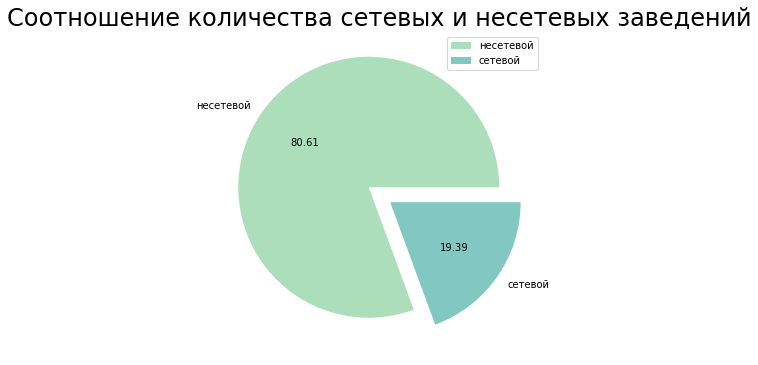

In [21]:
palette_GnBu_d = sns.color_palette('GnBu_d', 30)
fig, ax = plt.subplots(figsize = (15, 6))
colors = sns.color_palette([palette_GnBu_d[0], palette_GnBu_d[6]])
plt.pie (chain_pivot['quantity'], explode=[0.1,0.1], colors=colors, labels=['несетевой', 'сетевой'], autopct='%.2f')
plt.legend(['несетевой', 'сетевой'], loc = 'upper right')
ax.set_title('Cоотношение количества сетевых и несетевых заведений', size = 24 )
plt.show()

Несетевых заведений значительно больше. Более 80% заведений несетевые, менее 20% заведений сетевые.

#### Виды объектов общественного питания, для которых характерно сетевое распространение

Выясним какие типы заведений общественного питания чаще всего бывают сетевыми. Составим таблицу типов заведений

In [22]:
#группировка по 2м столбцам: тип, сетевой
object_type_pivot = df.groupby(['object_type','chain'])['id'].count().reset_index()
object_type_pivot.rename(columns={'id': 'quantity'}, inplace=True)
object_type_pivot=object_type_pivot.sort_values(by=['object_type','chain','quantity'], ascending=False)
#функции замены текста да/нет на сетевой/несетевой
def chain(raw):
    if raw['chain']=='да':
        return 'сетевой'
    else:
        return 'несетевой'
#вызов функции замены текста да/нет на сетевой/несетевой
object_type_pivot['chain'] = object_type_pivot.apply(chain, axis=1)
#функция расчета процента
def percent(raw):
    return raw['quantity']/object_type_pivot[object_type_pivot['object_type']==raw['object_type']]['quantity'].sum()*100
#вызов функции расчета процента
object_type_pivot['persent'] = object_type_pivot.apply(percent, axis=1)
#форматирование процента
object_type_pivot['persent'] = object_type_pivot['persent'].map(lambda x : str(round(x, 2)) + ' %')
object_type_pivot  

,object_type,chain,quantity,persent
17,столовая,несетевой,2581,99.88 %
16,столовая,сетевой,3,0.12 %
15,ресторан,несетевой,1739,76.21 %
14,ресторан,сетевой,543,23.79 %
13,предприятие быстрого обслуживания,несетевой,1110,58.48 %
12,предприятие быстрого обслуживания,сетевой,788,41.52 %
11,магазин (отдел кулинарии),несетевой,195,71.43 %
10,магазин (отдел кулинарии),сетевой,78,28.57 %
9,кафетерий,несетевой,343,86.84 %
8,кафетерий,сетевой,52,13.16 %


Построим график.

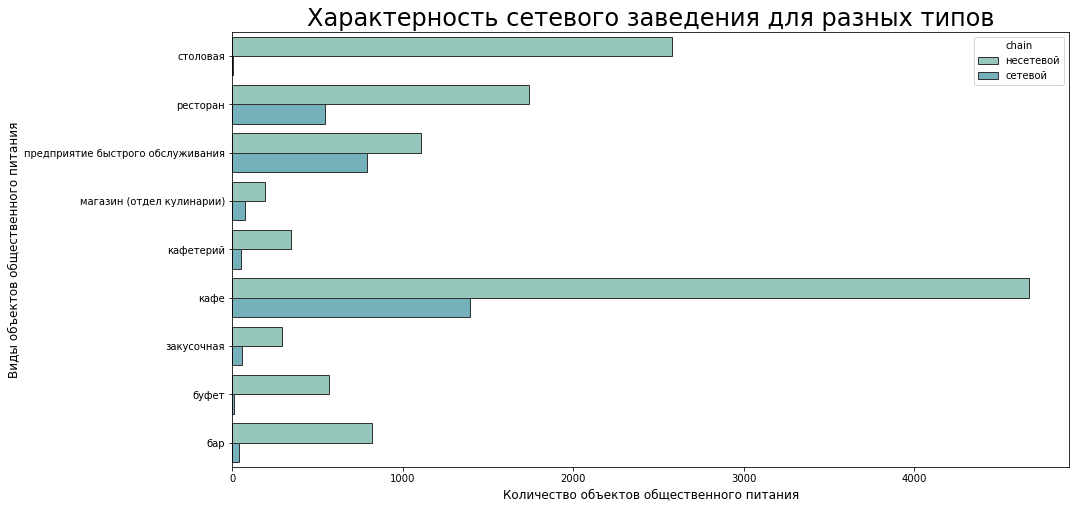

In [23]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.set_palette('GnBu_d', 5)
ax = sns.barplot(ax = ax, x = 'quantity', y = 'object_type', data = object_type_pivot, hue='chain', edgecolor=".2")
#sns.histplot(ax = ax, data=df, y="object_type", binwidth=0.0001, hue="chain", color=palette_GnBu_d[6])
ax.set_xlabel('Количество объектов общественного питания', size = 12 )
ax.set_ylabel('Виды объектов общественного питания' , size = 12 )
ax.set_title('Характерность сетевого заведения для разных типов', size = 24 )
plt.show()

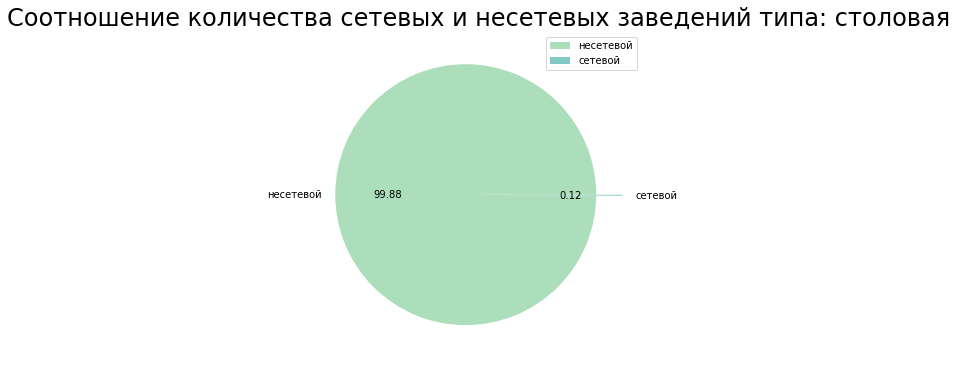

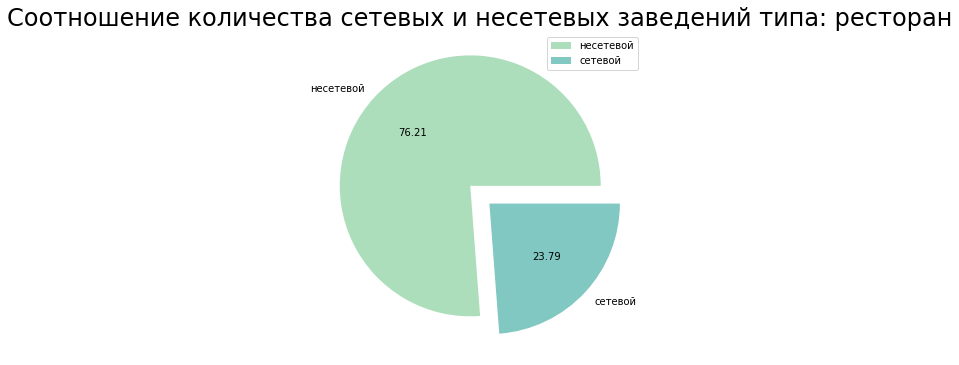

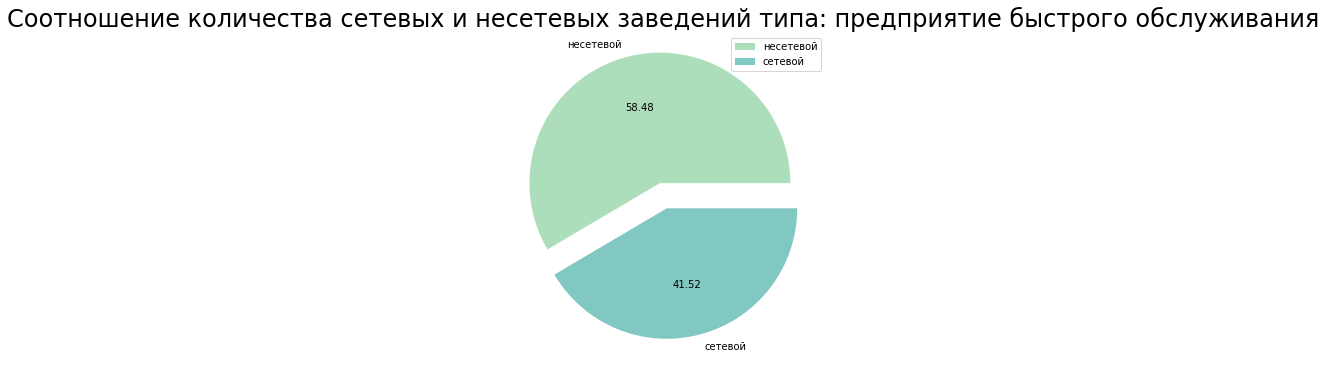

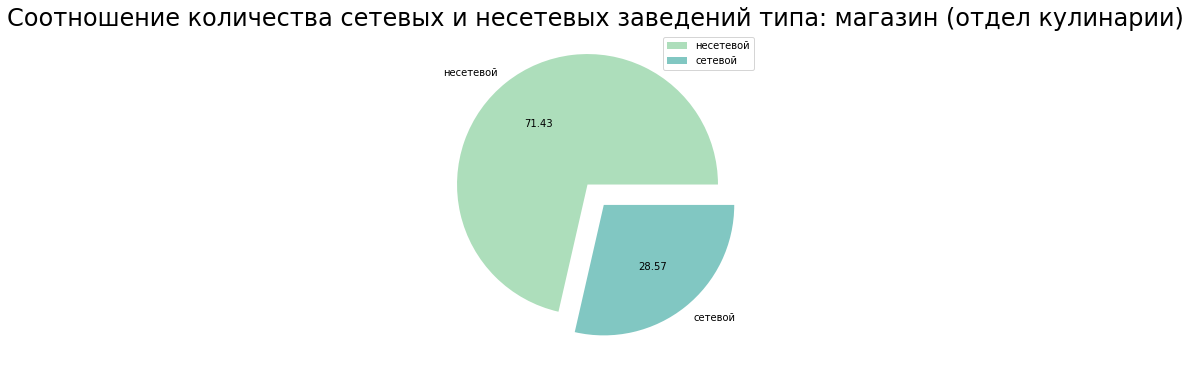

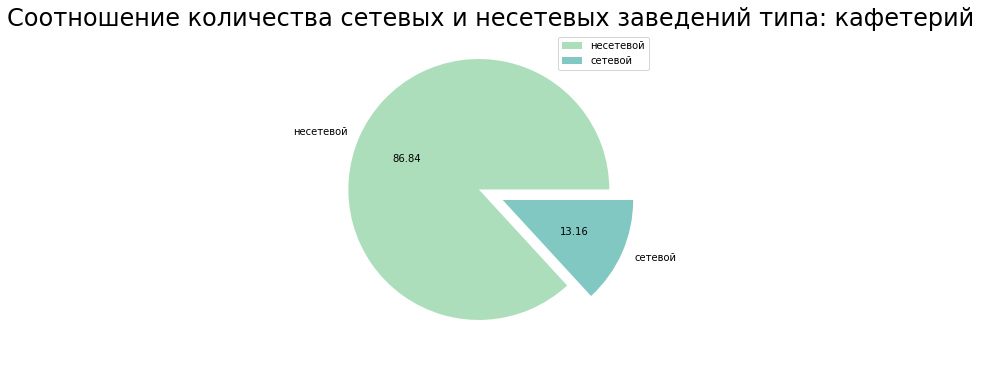

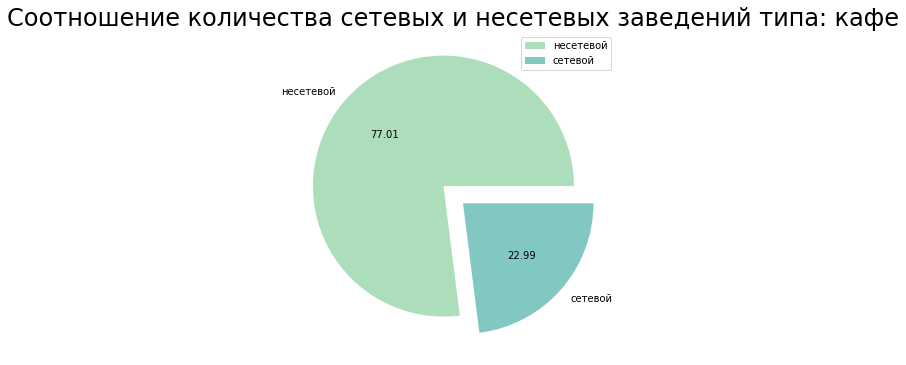

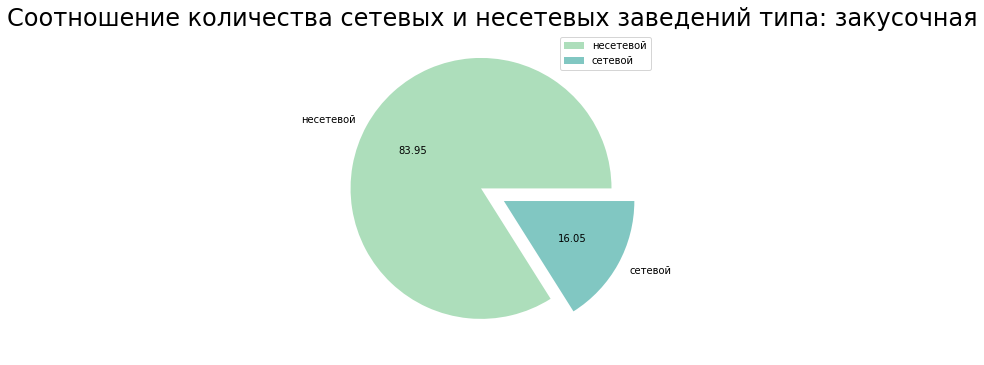

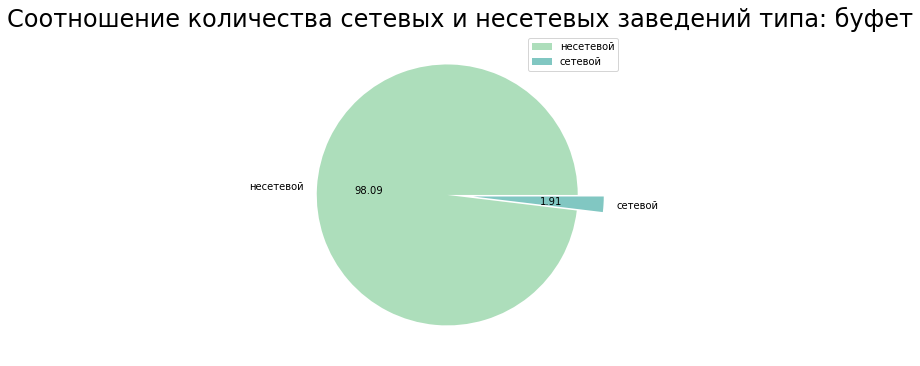

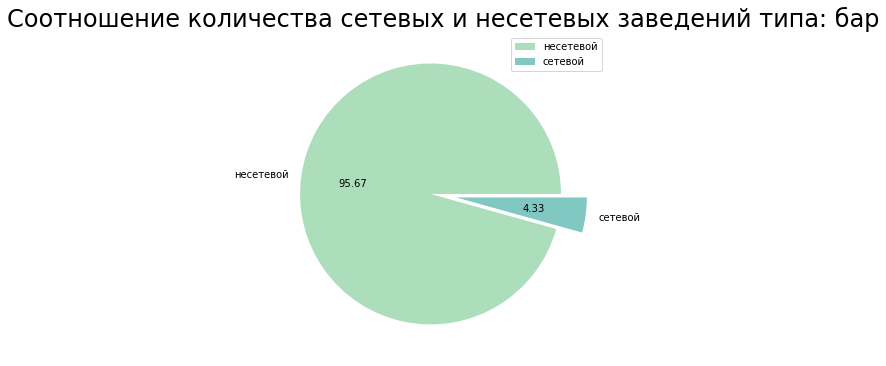

In [24]:
#построение круговой диаграммы в цикле для каждого типа из списка уникальных типов
for object_type in object_type_pivot['object_type'].unique():
    fig, ax = plt.subplots(figsize = (15, 6))
    colors = sns.color_palette([palette_GnBu_d[0], palette_GnBu_d[6]])
    plt.pie (object_type_pivot[object_type_pivot['object_type']==object_type]['quantity'],
             explode=[0.1,0.1], colors=colors, labels=['несетевой', 'сетевой'], autopct='%.2f')
    title = 'Cоотношение количества сетевых и несетевых заведений типа: ' + object_type
    ax.set_title(title, size = 24 )
    plt.legend(['несетевой', 'сетевой'], loc = 'upper right')
    plt.show()

Как мы видим, наибольшая доля сетевых заведений приходится на предприятия быстрого обслуживания. Меньше всего сетевых заведений среди столовых.

#### Характерность количества заведений и количества посадочных мест для сетевых заведений

Ответим на вопрос, что более характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Построим график распределения заведений по количеству посадочных мест.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


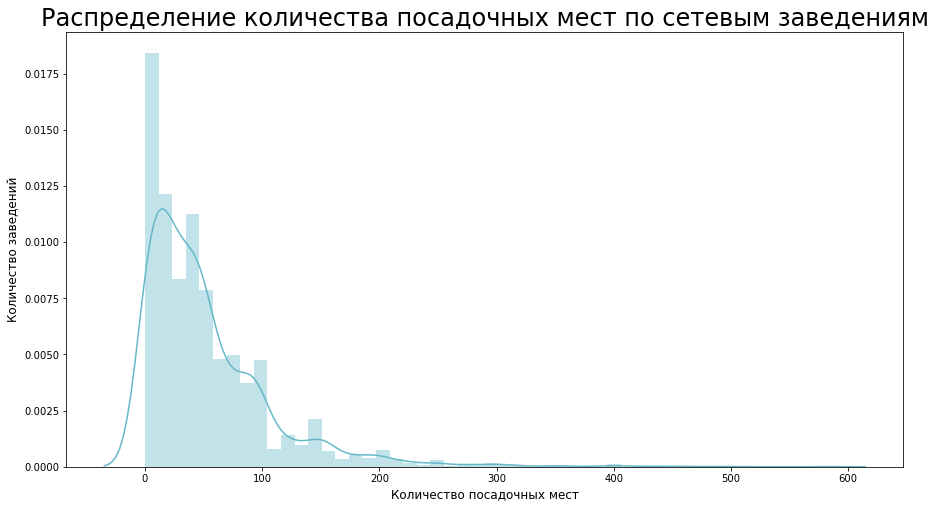

In [25]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.distplot(df.query('chain == "да"')['number'], color=palette_GnBu_d[10])
ax.set_xlabel('Количество посадочных мест', size = 12 )
ax.set_ylabel('Количество заведений' , size = 12 )
ax.set_title('Распределение количества посадочных мест по сетевым заведениям', size = 24 )
plt.show()

Мы видим, что чаще всего встречаются заведения, для которых количество посадочных мест не превышает 20. Составим таблицу с названиями сетевых заведений, количеством заведений с таким названием и средним количеством мест в заведении.

In [26]:
#группировка по названию заведния с подсчетом медианнго значения мест и количества заведений с таким названием
pivot_chain = df[df['chain']=='да'].groupby('object_name').agg({'number': ['median', 'count']})
pivot_chain = pivot_chain.reset_index(drop=False)
pivot_chain.columns = ['object_name', 'number_median', 'number_of_establishments']
pivot_chain.head(10)

,object_name,number_median,number_of_establishments
0,Beverly Hills Diner,88.0,1
1,Bierloga,75.0,1
2,Black & White,40.0,1
3,Bocconcino,68.0,3
4,BooBo,46.0,1
5,Bubbleology,6.0,1
6,Burger Club,20.0,3
7,COFIX,10.0,3
8,CORREAS,32.0,1
9,CoffeeShop,0.0,1


Мы видим, что в таблицу попало много заведений с признаком сетевого заведения, но у которых всего одно заведение в Москве. Уберем их из выборки.

In [27]:
pivot_chain = pivot_chain.query('number_of_establishments > 1')

Посчитаем перецентиль посадочных мест и колличества заведений.

In [28]:
print('Пперецентиль количества посадочных мест 30%, 70%:', np.percentile(pivot_chain['number_median'], [40, 60]))
print('Пперецентиль количества заведений в сети 30%, 70%:', np.percentile(pivot_chain['number_of_establishments'], [40, 60]))

Пперецентиль количества посадочных мест 30%, 70%: [30.  55.4]
Пперецентиль количества заведений в сети 30%, 70%: [3. 4.]


Определим понятия много-мало так:
    
* много посадочных мест - 55 и более
* мало посадочных мест - 30 и менее
* много заведений в сети - 4 и более
* мало заведений в сети - 3 и менее

Посчитаем процент сетей в которых большое количество заведений с маленьким количеством мест и процент сетей в которых маленькое количество заведений с большим количеством мест.

In [29]:
print('Процент сетей в которых большое количество заведений с маленьким количеством посадочных мест -',
     round(len(pivot_chain[(pivot_chain['number_median']<=30)&(pivot_chain['number_of_establishments']>=4)]['object_name'])/
           len(pivot_chain['object_name'])*100, 2), '%')
print('Процент сетей в которых маленькое количество заведений с большим количеством посадочных мест -',
     round(len(pivot_chain[(pivot_chain['number_median']>=55)&(pivot_chain['number_of_establishments']<=3)]['object_name'])/
           len(pivot_chain['object_name'])*100, 2), '%')

Процент сетей в которых большое количество заведений с маленьким количеством посадочных мест - 20.44 %
Процент сетей в которых маленькое количество заведений с большим количеством посадочных мест - 23.72 %


Ситуация, когда в сети много заведений с маленьким количеством мест более типична, чем малое количество заведений с большим количеством мест.

Построим диаграмму рассеяния.

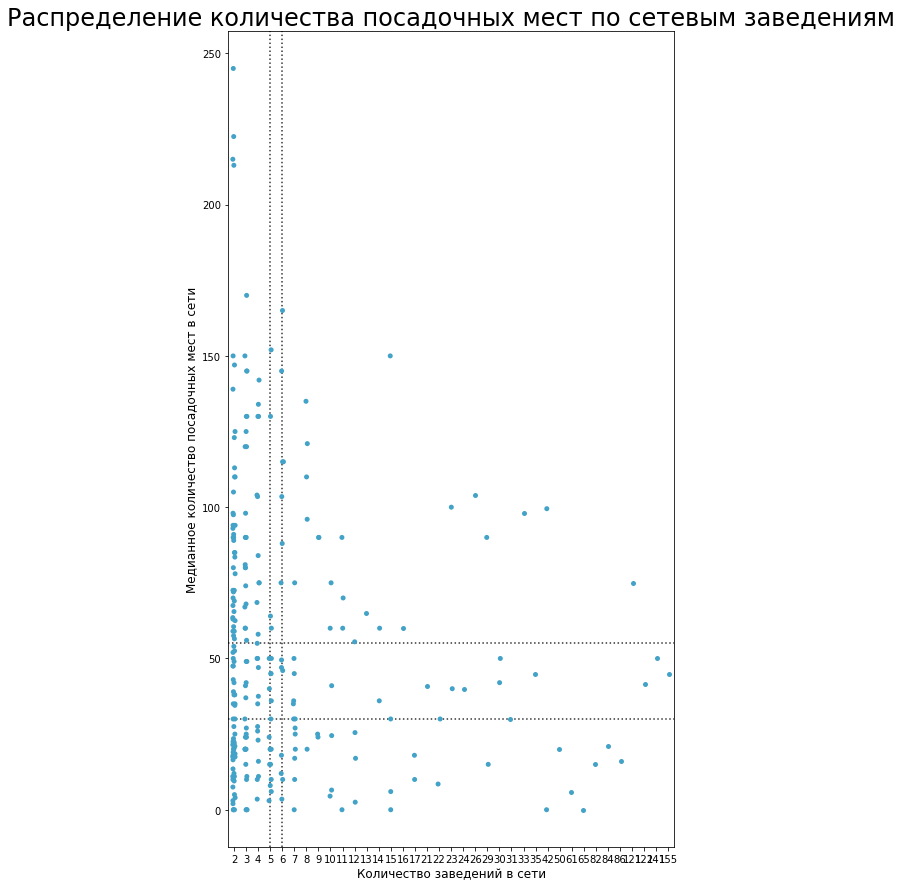

In [30]:
fig, ax = plt.subplots(figsize = (8, 15))
sns.set_palette('GnBu_d', 5)
sns.stripplot(x='number_of_establishments', y='number_median', data=pivot_chain, color=palette_GnBu_d[15])
ax.set_xlabel('Количество заведений в сети', size = 12 )
ax.set_ylabel('Медианное количество посадочных мест в сети' , size = 12 )
ax.set_title('Распределение количества посадочных мест по сетевым заведениям', size = 24 )
ax.axhline(round(np.percentile(pivot_chain['number_median'], 40)), ls=":", c=".2")
ax.axhline(round(np.percentile(pivot_chain['number_median'], 60)), ls=":", c=".2")
ax.axvline(round(np.percentile(pivot_chain['number_of_establishments'], 40)), ls=":", c=".2")
ax.axvline(round(np.percentile(pivot_chain['number_of_establishments'], 60)), ls=":", c=".2")
plt.show()

Ситуация, когда в сети много заведений с маленьким количеством мест (верхний левый квадрат графика) более типична, чем малое количество заведений с большим количеством мест (нижний правый квадрат графика).

#### Среднее количество посадочных мест для разных видов объектов общественного питания

Для каждого вида объекта общественного питания посчитаем среднее количество посадочных мест.

In [31]:
#срез таблицы с сетевыми заведениями группируем по типу с подсчетом среднего колличества посадочных мест
pivot_object_type = df[df['chain']=='да'].groupby('object_type').agg({'number': 'mean'})
pivot_object_type = pivot_object_type.reset_index(drop=False)
pivot_object_type.columns = ['object_type', 'number_mean']
pivot_object_type = pivot_object_type.sort_values(by='number_mean', ascending=False)
pivot_object_type

,object_type,number_mean
8,столовая,112.333333
7,ресторан,100.362799
0,бар,53.027027
3,кафе,47.426934
6,предприятие быстрого обслуживания,40.319797
2,закусочная,14.375000
1,буфет,12.727273
4,кафетерий,12.269231
5,магазин (отдел кулинарии),8.679487


Построим график.

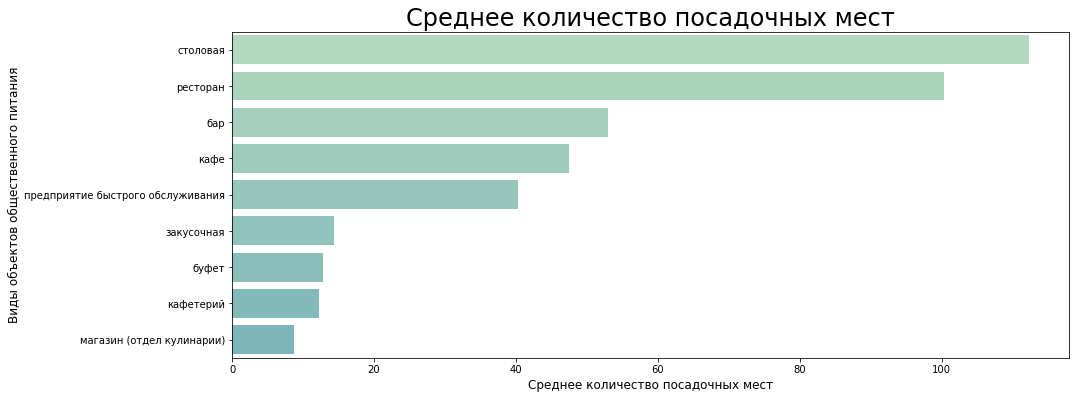

In [32]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.set_palette('GnBu_d', 30)
sns.barplot(ax = ax, x = 'number_mean', y = 'object_type', data = pivot_object_type)
ax.set_xlabel('Среднее количество посадочных мест', size = 12 )
ax.set_ylabel('Виды объектов общественного питания' , size = 12 )
ax.set_title('Среднее количество посадочных мест', size = 24 )
plt.show()

В среднем больше всего посадочных мест бывает в столовых, меньше всего в магазинах с отделом кулинария.

#### Топ-10 улиц по количеству объектов общественного питания

Выделим в отдельный столбец информацию об улице из столбца `address`. Мы видим, что некоторые адреса начинаются с улиц, а некоторые с города. Очистим адреса от города.

In [33]:
#функция удаления 'город Москва, ' из начала адреса
def city(raw):
    if raw['address'].startswith('город Москва, '):
        return raw['address'][13:]
    else:
        return raw['address']
#вызов функции
df['address'] = df.apply(city, axis=1)
df.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"Абрамцевская улица, дом 9, корпус 1",50


Найдем тип адреса.  По информации с Википедии: типы (виды) улиц Москвы: аллеи, бульвары, деревни, кварталы, линии, микрорайоны, мосты, набережные, парки, переулки, площади, посёлки, проезды, проектируемые проезды, просеки, проспекты, тупики и шоссе. Если в адрес будет вхождение одного из слов: 'аллея', 'бульвар', 'деревня', 'квартал', 'линия', 'микрорайон', 'мост', 'набережная', 'парк', 'переулок', 'площадь', 'поселок', 'проезд', 'проектируемый проезд', 'просек', 'проспект', 'тупик', 'улица', 'шоссе', то такой тип адреса и будет. Если таких вхождений нет, то в тип адреса запишем 'unknown'. Выведем на экран список уникальных типов.

In [34]:
#функция приведения адреса к нижнему регистру
def s_lower(raw):
    return raw['address'].lower()
#функция определения типа адреса
def type_street(raw):
    s_types = ['аллея', 'бульвар', 'деревня', 'квартал', 'линия', 'микрорайон', 'мост', 'набережная', 'парк', 'переулок',
               'площадь', 'посёлок', 'проезд', 'проектируемый проезд', 'просек', 'проспект', 'тупик', 'улица', 'шоссе']
    #для любого адреса определяем тип как 'unknown'
    types = 'unknown'
    #для каждого типа адреса из списка ищем вхождение типа в адрес
    for s_type in s_types:
        #если вхождение найдено меняем тип на текущий тип из списка
        if raw['address'].find(s_type)!=-1:
            types = s_type
    #возвращаем тип
    return types
#вызов функции приведения адреса к нижнему регистру
df['address'] = df.apply(s_lower, axis=1)
#вызов функции  определения типа адреса
df['type'] = df.apply(type_street, axis=1)
df['type'].unique()

array(['улица', 'переулок', 'шоссе', 'проезд', 'проспект', 'набережная',
       'бульвар', 'площадь', 'квартал', 'аллея', 'линия', 'unknown',
       'микрорайон', 'деревня', 'посёлок', 'тупик',
       'проектируемый проезд', 'просек'], dtype=object)

Посмотрим, что за адреса попали в тип 'unknown'.

In [35]:
df[df['type']=='unknown']

,id,object_name,chain,object_type,address,number,type
1405,20199,ЭТО,нет,кафе,"город зеленоград, корпус 401",35,unknown
1406,68113,Френдс,нет,кафе,"город зеленоград, корпус 435",34,unknown
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город зеленоград, корпус 436",40,unknown
1408,22982,Альфорно,нет,кафе,"город зеленоград, корпус 438",49,unknown
1409,151267,Альфорно,нет,кафе,"город зеленоград, корпус 438",45,unknown
1410,150537,Кафе «Вечный зов»,нет,кафе,"город зеленоград, корпус 834а",30,unknown
1411,128119,Кафе «Суши Сет»,да,предприятие быстрого обслуживания,"город зеленоград, корпус 1106",7,unknown
1412,24023,Пекарня «Дружок-пирожок»,нет,кафетерий,"город зеленоград, корпус 1449",5,unknown
1440,24022,Бар «ДЖАНГО»,нет,бар,"город зеленоград, корпус 1456",50,unknown
1441,149745,68. ПАУЗА,нет,бар,"город зеленоград, корпус 1456",48,unknown


В список типов попали адреса без улиц, относящиеся к типам 'город зеленоград, корпус ...', 'поселение', 'километр', 'территория'. Удалим их из списка, т.к. не ясно как считать количество заведений на таких "улицах". Посчитаем процент строк подлежащих удалению.

In [36]:
print('% строк подлежащих удалению:', round((len(df[df['type']=='unknown']['type'])/len(df['type'])*100), 2))

% строк подлежащих удалению: 1.35


Таких строк не много. Удаляем их.

In [37]:
df=df[df['type']!='unknown']

Больше адресов неизвестного типа нет. Создадим колонку с названием улицы.

In [38]:
#функция извлечения улицы из адреса
def street(raw):
    #ищем позицию вхождения типа адреса в адрес
    pos=raw['address'].find(raw['type'])
    #начало названия улицы считаем сибволом , до вхождения типа
    start = raw['address'].find(',', 0, pos)
    #конец названия улицы считаем сибволом , после вхождения типа
    end = raw['address'].find(',', pos, len(raw['address']))
    #если , до типа не найдена, начало названия улицы - начало адреса
    if start == -1:
        start = 0
    #если , до типа найдена, начало к началу названия улицы прибавим 2 символа
    else:
        start =+2
    #если , после типа не найдена, конец названия улицы -  конец адреса
    if end == -1:
        end = len(raw['address'])
    #возращаем часть адреса от установленного начала, до установленного конца
    return raw['address'][start:end]

df['street'] = df.apply(street, axis=1)
df.head(10)

,id,object_name,chain,object_type,address,number,type,street
0,151635,СМЕТАНА,нет,кафе,"улица егора абакумова, дом 9",48,улица,улица егора абакумова
1,77874,Родник,нет,кафе,"улица талалихина, дом 2/1, корпус 1",35,улица,улица талалихина
2,24309,Кафе «Академия»,нет,кафе,"абельмановская улица, дом 6",95,улица,абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"абрамцевская улица, дом 1",40,улица,абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"абрамцевская улица, дом 9, корпус 1",50,улица,абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"абрамцевская улица, дом 15, корпус 1",240,улица,абрамцевская улица
6,148815,Брусника,да,кафе,"переулок сивцев вражек, дом 6/2",10,переулок,переулок сивцев вражек
7,20957,Буфет МТУСИ,нет,столовая,"авиамоторная улица, дом 8, строение 1",90,улица,авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"авиамоторная улица, дом 8, строение 1",150,улица,авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"авиамоторная улица, дом 8, строение 1",120,улица,авиамоторная улица


Посчитаем количество заведений на каждой улице, выведем топ-10 на экран.

In [39]:
df_street_pivot = df.groupby('street').agg({'id': 'count'})
df_street_pivot = df_street_pivot.reset_index(drop=False)
df_street_pivot.columns = ['street', 'number_establishments']
df_street_pivot = df_street_pivot.sort_values(by='number_establishments', ascending=False)
df_street_pivot.head(10)

,street,number_establishments
1028,проспект мира,204
1032,профсоюзная улица,181
674,ленинградский проспект,170
989,пресненская набережная,167
397,варшавское шоссе,161
677,ленинский проспект,147
1025,проспект вернадского,128
665,кутузовский проспект,114
590,каширское шоссе,111
596,кировоградская улица,108


Топ-10 улиц на экране. Больше всего заведений на проспекте Мира. Построим график.

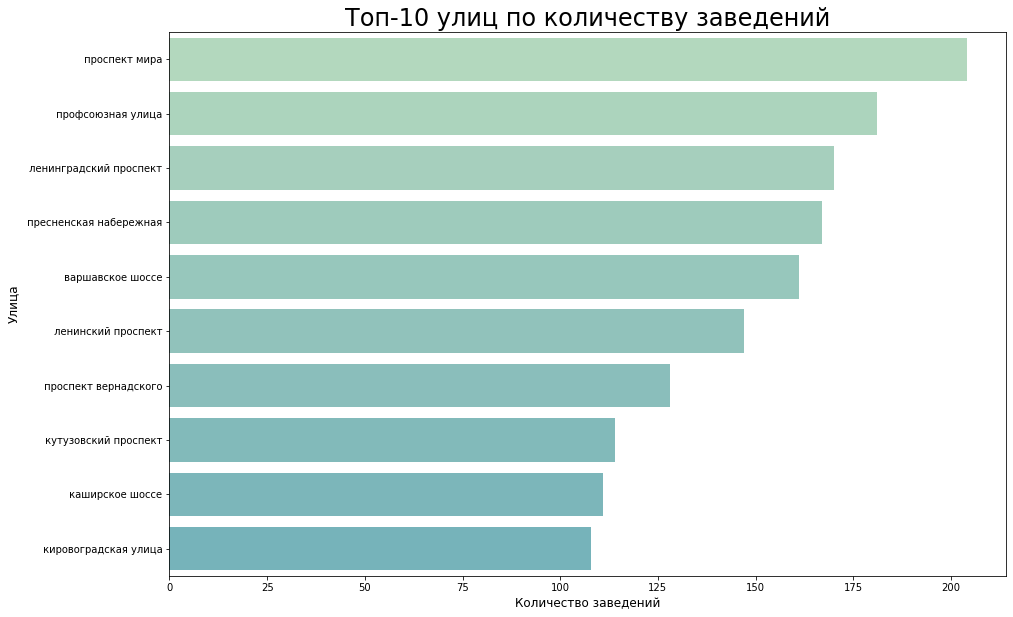

In [40]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.set_palette('GnBu_d', 30)
sns.barplot(ax = ax, x = 'number_establishments', y = 'street', data = df_street_pivot.head(10))
ax.set_xlabel('Количество заведений', size = 12 )
ax.set_ylabel('Улица' , size = 12 )
ax.set_title('Топ-10 улиц по количеству заведений', size = 24 )
plt.show()

Определим районы удиц, вошедщих в топ. Данных о районах у нас нет. В топе всего 10 улиц, можно определить район в ручную. Но в дальнейшем нужно будет опредилить районы улиц, на которых находится только одно заведение. Таких улиц будет много, поэтому создадим функцию поиска района. Данные о районах возьмем с сайта `https://ru.wikipedia.org/`.

Для начала создадим список районов Москвы, воспользовавшись информацией с Википедии.

In [41]:
mos_raion = (['Арбат', 'Басманный', 'Замоскворечье', 'Красносельский', 'Мещанский', 'Пресненский', 'Таганский', 'Тверской',
              'Хамовники', 'Якиманка', 'Аэропорт', 'Беговой', 'Бескудниковский', 'Войковский', 'Восточное Дегунино',
              'Головинский', 'Дмитровский', 'Западное Дегунино', 'Коптево', 'Левобережный', 'Молжаниновский', 'Савёловский',
              'Сокол', 'Тимирязевский', 'Ховрино', 'Хорошёвский', 'Алексеевский', 'Алтуфьевский', 'Бабушкинский', 'Бибирево',
              'Бутырский', 'Лианозово', 'Лосиноостровский', 'Марфино', 'Марьина Роща', 'Останкинский', 'Отрадное', 'Ростокино',
              'Свиблово', 'Северный', 'Северное Медведково', 'Южное Медведково', ' Ярославский', 'Богородское', 'Вешняки',
              'Восточный', 'Восточное Измайлово', 'Гольяново', 'Ивановское', 'Измайлово', 'Косино-Ухтомский', 'Метрогородок',
              'Новогиреево', 'Новокосино', 'Перово', 'Преображенское', 'Северное Измайлово', 'Соколиная Гора', 'Сокольники',
              'Выхино-Жулебино', 'Капотня', 'Кузьминки', 'Лефортово', 'Люблино', 'Марьино', 'Некрасовка', 'Нижегородский',
              'Печатники', 'Рязанский', 'Текстильщики', 'Южнопортовый', 'Бирюлёво Восточное', 'Бирюлёво Западное', 'Братеево',
              'Даниловский', 'Донской', 'Зябликово', 'Москворечье-Сабурово', 'Нагатино-Садовники', 'Нагатинский Затон',
              'Нагорный', 'Орехово-Борисово Северное', 'Орехово-Борисово Южное', 'Царицыно', 'Чертаново Северное',
              'Чертаново Центральное', 'Чертаново Южное', 'Академический', 'Гагаринский', 'Зюзино', 'Коньково', 'Котловка',
              'Ломоносовский', 'Обручевский', 'Северное Бутово', 'Тёплый Стан', 'Черёмушки', 'Южное Бутово', 'Ясенево',
              'Внуково', 'Дорогомилово', 'Крылатское', 'Кунцево', 'Можайский', 'Ново-Переделкино', 'Очаково-Матвеевское',
              'Проспект Вернадского', 'Раменки', 'Солнцево', 'Тропарёво-Никулино', 'Филёвский Парк', 'Фили-Давыдково',
              'Куркино', 'Митино', 'Покровское-Стрешнево', 'Северное Тушино', 'Строгино', 'Хорошёво-Мнёвники', 'Щукино',
              'Южное Тушино', 'Матушкино', 'Савёлки', 'Старое Крюково', 'Силино', 'Крюково', 'поселение Воскресенское',
              'поселение Внуковское', 'поселение Десёновское', 'поселение Кокошкино', 'поселение Марушкинское',
              'поселение Московский', 'Мосрентген', 'поселение Рязановское', 'поселение Сосенское', 'поселение Филимонковское',
              'поселение Щербинка', 'поселение Вороновское', 'поселение Киевский', 'поселение Клёновское',
              'поселение Краснопахорское', 'поселение Михайлово-Ярцевское', 'поселение Новофёдоровское',
              'поселение Первомайское', 'поселение Роговское', 'поселение Троицк', 'поселение Щаповское'])

In [42]:
#отделяем топ 10 улиц в отдельную таблицу
top10_streets = df_street_pivot.head(10)

#функция для парсинга Википедии через API с подбором значимого заглавного симбвола (возвращает район)
def raion(raw):
    street_name = raw['street']
    street_name = street_name.replace(' ', '_')
    street_name = street_name + '_(Москва)'
    if street_name[0] == '_':
        street_name = street_name[1:]
    site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
    response = requests.get(site_name)
    site = response.text
    if site.find('Общая информация') == -1:
        street_name = street_name.title()
        site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
        response = requests.get(site_name)
        site = response.text
    if site.find('Общая информация') == -1:
        street_name = street_name[0].lower() + street_name[1:]
        site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
        response = requests.get(site_name)
        site = response.text
    if site.find('Общая информация') == -1:
        street_name = street_name.lower()
        street_name = street_name.capitalize()
        site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
        response = requests.get(site_name)
        site = response.text
    if site.find('Общая информация') == -1:
        street_name = raw['street']
        street_name = street_name.replace(' ', '_')
        if street_name[0] == '_':
            street_name = street_name[1:]
        site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
        response = requests.get(site_name)
        site = response.text
        if site.find('Общая информация') == -1:
            street_name = street_name.title()
            site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
            response = requests.get(site_name)
            site = response.text
        if site.find('Общая информация') == -1:
            street_name = street_name[0].lower() + street_name[1:]
            site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
            response = requests.get(site_name)
            site = response.text
        if site.find('Общая информация') == -1:
            street_name = street_name.lower()
            street_name = street_name.capitalize()
            site_name = f'https://ru.wikipedia.org/wiki/{street_name}'
            response = requests.get(site_name)
            site = response.text
    site = site[site.find('Общая информация'):]
    site = site[site.find('Район')+5:]
    site = site[:(site.find('</tr>'))]
    raion = []
    for raion_m in mos_raion:
        if site.find(raion_m) != -1:
            raion.append(raion_m)
    return raion

top10_streets['raion'] = top10_streets.apply(raion, axis=1)
top10_streets

C:\Users\8EF9~1\AppData\Local\Temp/ipykernel_7708/2897747604.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_streets['raion'] = top10_streets.apply(raion, axis=1)


,street,number_establishments,raion
1028,проспект мира,204,"[Мещанский, Алексеевский, Марьина Роща, Останкинский, Ростокино, Свиблово]"
1032,профсоюзная улица,181,"[Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево]"
674,ленинградский проспект,170,"[Аэропорт, Беговой, Сокол, Хорошёвский]"
989,пресненская набережная,167,[Пресненский]
397,варшавское шоссе,161,"[Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, Южное Бутово]"
677,ленинский проспект,147,"[Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино]"
1025,проспект вернадского,128,"[Гагаринский, Ломоносовский, Проспект Вернадского, Раменки, Тропарёво-Никулино]"
665,кутузовский проспект,114,"[Дорогомилово, Фили-Давыдково]"
590,каширское шоссе,111,"[Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Северное, Орехово-Борисово Южное]"
596,кировоградская улица,108,"[Чертаново Северное, Чертаново Центральное, Чертаново Южное]"


Улицы и их районы на экране.

Выведем на экран список районов вошедших в ТОП-10.

In [43]:
def raions_unique(table):
    raions = table['raion'].tolist()
    my_raions = []
    for r in raions:
        my_raions.extend(r)
    raions_unique_list = []
    for r in my_raions:
        if r not in raions_unique_list:
            raions_unique_list.append(r)
    raions_unique_list = sorted(raions_unique_list)
    return raions_unique_list
raions_unique_list_top = raions_unique(top10_streets)
print(raions_unique_list_top)

['Академический', 'Алексеевский', 'Аэропорт', 'Беговой', 'Гагаринский', 'Донской', 'Дорогомилово', 'Коньково', 'Ломоносовский', 'Марьина Роща', 'Мещанский', 'Москворечье-Сабурово', 'Нагатино-Садовники', 'Нагорный', 'Обручевский', 'Орехово-Борисово Северное', 'Орехово-Борисово Южное', 'Останкинский', 'Пресненский', 'Проспект Вернадского', 'Раменки', 'Ростокино', 'Свиблово', 'Сокол', 'Тропарёво-Никулино', 'Тёплый Стан', 'Фили-Давыдково', 'Хорошёвский', 'Чертаново Северное', 'Чертаново Центральное', 'Чертаново Южное', 'Черёмушки', 'Южное Бутово', 'Якиманка', 'Ясенево']


В топ-10 улиц вошли:

* проспект Мира	- проходит по территории районов Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино;
* Профсоюзная улица	- проходит по территории районов Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево;
* Ленинградский проспект - проходит по территории районов Беговой, Аэропорт, Сокол, Хорошёвский;
* Пресненская набережная - район 	Пресненский;
* Варшавское шоссе	- проходит по территории районов Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, Северное Бутово, Южное Бутово;
* Ленинский проспект - проходит по территории районов Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино;
* проспект Вернадского	- проходит по территории районов Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино;
* Кутузовский проспект	- проходит по территории районов Дорогомилово, Фили-Давыдково;
* Каширское шоссе	- проходит по территории районов Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники;
* Кировоградская улица	- проходит по территории районов Чертаново Северное, Чертаново Центральное и Чертаново Южное.

#### Число улиц с одним объектом общественного питания

Найдем число улиц с одним объектом общественного питания.

In [44]:
print('Число улиц одним объектом общественного питания',
      len(df_street_pivot[df_street_pivot['number_establishments']==1]['street']))

Число улиц одним объектом общественного питания 646


Определим районы для этих улиц.

In [45]:
import time
start_time = time.time()
one_street = df_street_pivot[df_street_pivot['number_establishments']==1]
one_street['raion'] = one_street.apply(raion, axis=1)
one_street = one_street.sort_values(by='raion', ascending=False)
one_street.head()

C:\Users\8EF9~1\AppData\Local\Temp/ipykernel_7708/4288337686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_street['raion'] = one_street.apply(raion, axis=1)


,street,number_establishments,raion
1799,ясногорская улица,1,[Ясенево]
1609,улица рокотова,1,[Ясенево]
1210,тарусская улица,1,[Ясенево]
1419,улица инессы арманд,1,[Ясенево]
1266,улица айвазовского,1,[Ясенево]


Выведем на экран список районов, в которых находятся такие улицы. 

In [46]:
raions_unique_list_low = raions_unique(one_street)
print(raions_unique_list_low)

['Академический', 'Алексеевский', 'Алтуфьевский', 'Арбат', 'Аэропорт', 'Бабушкинский', 'Басманный', 'Беговой', 'Бескудниковский', 'Бибирево', 'Бирюлёво Восточное', 'Бирюлёво Западное', 'Богородское', 'Бутырский', 'Внуково', 'Войковский', 'Выхино-Жулебино', 'Гагаринский', 'Головинский', 'Гольяново', 'Даниловский', 'Дмитровский', 'Донской', 'Дорогомилово', 'Замоскворечье', 'Западное Дегунино', 'Зюзино', 'Ивановское', 'Измайлово', 'Капотня', 'Коньково', 'Коптево', 'Косино-Ухтомский', 'Котловка', 'Красносельский', 'Кузьминки', 'Кунцево', 'Куркино', 'Левобережный', 'Лефортово', 'Лианозово', 'Ломоносовский', 'Лосиноостровский', 'Люблино', 'Марфино', 'Марьина Роща', 'Марьино', 'Метрогородок', 'Мещанский', 'Митино', 'Можайский', 'Молжаниновский', 'Москворечье-Сабурово', 'Нагатино-Садовники', 'Нагорный', 'Некрасовка', 'Нижегородский', 'Новогиреево', 'Обручевский', 'Останкинский', 'Отрадное', 'Очаково-Матвеевское', 'Перово', 'Печатники', 'Покровское-Стрешнево', 'Преображенское', 'Пресненский', '

#### Визуализация районов

Визуалтируем районы на карте Москвы. Для этого используем Shapefile - файл векторного формата с помощью которго можно отобразить геометрические  фигуры, в нашем случае - районы Москвы. Для визуализации районов используем данные с сайта NextGis. Для начала загрузим эти данные.

In [47]:
# Путь к шейп-архиву 
ZIP_PATH = 'zip://C:/Users/Беломыцева Ольга/datasets/RU-MOW-787353d3-20220910-ru-shape.zip!data/'

# Названия для переменных слоев и названия соответствующих shp Файлов
LAYERS_DICT = {
    'boundary_L4': 'boundary-polygon-lvl4.shp', # Административные границы различных уровней
    'boundary_L5': 'boundary-polygon-lvl5.shp',
    'boundary_L8': 'boundary-polygon-lvl8.shp'
               }

# Подгружаем слои в соответствующие переменные в рамках цикла
i = 0
for layer in LAYERS_DICT.keys():
    path_to_layer = ZIP_PATH + LAYERS_DICT[layer]
    encoding = 'utf-8'
    globals()[layer] = gpd.read_file(path_to_layer, encoding=encoding)
    
    i+=1
    print(f'[{i}/{len(LAYERS_DICT)}] LOADED {layer} WITH ENCODING {encoding}')

[1/3] LOADED boundary_L4 WITH ENCODING utf-8
[2/3] LOADED boundary_L5 WITH ENCODING utf-8
[3/3] LOADED boundary_L8 WITH ENCODING utf-8


Выведем полученные данные на экран.

In [48]:
pd.set_option('max_colwidth', 20)
boundary_L8.head()

,NAME,NAME_EN,NAME_RU,ADMIN_LVL,OSM_TYPE,OSM_ID,ADMIN_L1D,ADMIN_L1,ADMIN_L2D,ADMIN_L2,ADMIN_L3D,ADMIN_L3,ADMIN_L4D,ADMIN_L4,ADMIN_L5D,ADMIN_L5,ADMIN_L6D,ADMIN_L6,ADMIN_L7D,ADMIN_L7,ADMIN_L8D,ADMIN_L8,ADMIN_L9D,ADMIN_L9,ADMIN_L10D,ADMIN_L10,oktmo,okato,geometry
0,район Внуково,Vnukovo District,район Внуково,8,relation,181288,None,None,None,None,None,None,102269,Москва,226149,Западный админис...,None,None,None,None,None,None,None,None,None,None,45317000,45268552000,MULTIPOLYGON (((...
1,район Кузьминки,Kuzminki District,район Кузьминки,8,relation,444812,None,None,None,None,None,None,102269,Москва,1278703,Юго-Восточный ад...,None,None,None,None,None,None,None,None,None,None,45387000,45290562000,POLYGON ((37.804...
2,Басманный район,Basmanny District,Басманный район,8,relation,2162195,None,None,None,None,None,None,102269,Москва,2162196,Центральный адми...,None,None,None,None,None,None,None,None,None,None,45375000,45286555000,POLYGON ((37.665...
3,поселение Щаповское,None,None,8,relation,2092931,None,None,None,None,None,None,102269,Москва,2263059,Троицкий админис...,None,None,None,None,None,None,None,None,None,None,45961000,45298583000,POLYGON ((37.371...
4,поселение Михайл...,None,None,8,relation,2092927,None,None,None,None,None,None,102269,Москва,2263059,Троицкий админис...,None,None,None,None,None,None,None,None,None,None,45951000,45298564000,POLYGON ((37.150...


Удалим из данных строки, в которых пропущено название района.

In [49]:
boundary_L8 = boundary_L8.dropna(subset=['NAME_RU'])
boundary_L8.head()

,NAME,NAME_EN,NAME_RU,ADMIN_LVL,OSM_TYPE,OSM_ID,ADMIN_L1D,ADMIN_L1,ADMIN_L2D,ADMIN_L2,ADMIN_L3D,ADMIN_L3,ADMIN_L4D,ADMIN_L4,ADMIN_L5D,ADMIN_L5,ADMIN_L6D,ADMIN_L6,ADMIN_L7D,ADMIN_L7,ADMIN_L8D,ADMIN_L8,ADMIN_L9D,ADMIN_L9,ADMIN_L10D,ADMIN_L10,oktmo,okato,geometry
0,район Внуково,Vnukovo District,район Внуково,8,relation,181288,None,None,None,None,None,None,102269,Москва,226149,Западный админис...,None,None,None,None,None,None,None,None,None,None,45317000,45268552000,MULTIPOLYGON (((...
1,район Кузьминки,Kuzminki District,район Кузьминки,8,relation,444812,None,None,None,None,None,None,102269,Москва,1278703,Юго-Восточный ад...,None,None,None,None,None,None,None,None,None,None,45387000,45290562000,POLYGON ((37.804...
2,Басманный район,Basmanny District,Басманный район,8,relation,2162195,None,None,None,None,None,None,102269,Москва,2162196,Центральный адми...,None,None,None,None,None,None,None,None,None,None,45375000,45286555000,POLYGON ((37.665...
11,район Старое Крю...,Staroye Kryukovo...,район Старое Крю...,8,relation,1320424,None,None,None,None,None,None,102269,Москва,1320358,Зеленоградский а...,None,None,None,None,None,None,None,None,None,None,45927000,45272576000,POLYGON ((37.201...
13,район Матушкино,Matushkino District,район Матушкино,8,relation,1320566,None,None,None,None,None,None,102269,Москва,1320358,Зеленоградский а...,None,None,None,None,None,None,None,None,None,None,45331000,45272562000,POLYGON ((37.212...


Теперь заполним данные о вхождении района в список районов, в которые попади улицы из списка топ или о вхождении района в список районов, в которые попади улицы всего с одним заведением общественного питания.

In [50]:
def raions_unique_list_in_map(raw):
    top=0
    low=0
    for r in raions_unique_list_top:
        if raw['NAME_RU'].find(r) != -1:
            top=1
    for r in raions_unique_list_low:
        if raw['NAME_RU'].find(r) != -1:
            low=1
    if top==1 and low==1:
        return 'в) районы попавшие в оба списка'
    elif top==1:
        return 'г) районы, через которые проходят улицы, вошедшие в ТОП-10'
    elif low==1:
        return 'б) районы, через которые проходят улицы, с единственным заведением общественного питания'
    else:
        return 'а) районы не вошедшие ни в один список'

boundary_L8['top_low'] = boundary_L8.apply(raions_unique_list_in_map, axis=1)
boundary_L8.head()

,NAME,NAME_EN,NAME_RU,ADMIN_LVL,OSM_TYPE,OSM_ID,ADMIN_L1D,ADMIN_L1,ADMIN_L2D,ADMIN_L2,ADMIN_L3D,ADMIN_L3,ADMIN_L4D,ADMIN_L4,ADMIN_L5D,ADMIN_L5,ADMIN_L6D,ADMIN_L6,ADMIN_L7D,ADMIN_L7,ADMIN_L8D,ADMIN_L8,ADMIN_L9D,ADMIN_L9,ADMIN_L10D,ADMIN_L10,oktmo,okato,geometry,top_low
0,район Внуково,Vnukovo District,район Внуково,8,relation,181288,None,None,None,None,None,None,102269,Москва,226149,Западный админис...,None,None,None,None,None,None,None,None,None,None,45317000,45268552000,MULTIPOLYGON (((...,"б) районы, через..."
1,район Кузьминки,Kuzminki District,район Кузьминки,8,relation,444812,None,None,None,None,None,None,102269,Москва,1278703,Юго-Восточный ад...,None,None,None,None,None,None,None,None,None,None,45387000,45290562000,POLYGON ((37.804...,"б) районы, через..."
2,Басманный район,Basmanny District,Басманный район,8,relation,2162195,None,None,None,None,None,None,102269,Москва,2162196,Центральный адми...,None,None,None,None,None,None,None,None,None,None,45375000,45286555000,POLYGON ((37.665...,"б) районы, через..."
11,район Старое Крю...,Staroye Kryukovo...,район Старое Крю...,8,relation,1320424,None,None,None,None,None,None,102269,Москва,1320358,Зеленоградский а...,None,None,None,None,None,None,None,None,None,None,45927000,45272576000,POLYGON ((37.201...,а) районы не вош...
13,район Матушкино,Matushkino District,район Матушкино,8,relation,1320566,None,None,None,None,None,None,102269,Москва,1320358,Зеленоградский а...,None,None,None,None,None,None,None,None,None,None,45331000,45272562000,POLYGON ((37.212...,а) районы не вош...


 Визуализируем районы на карте Москвы

<AxesSubplot:>

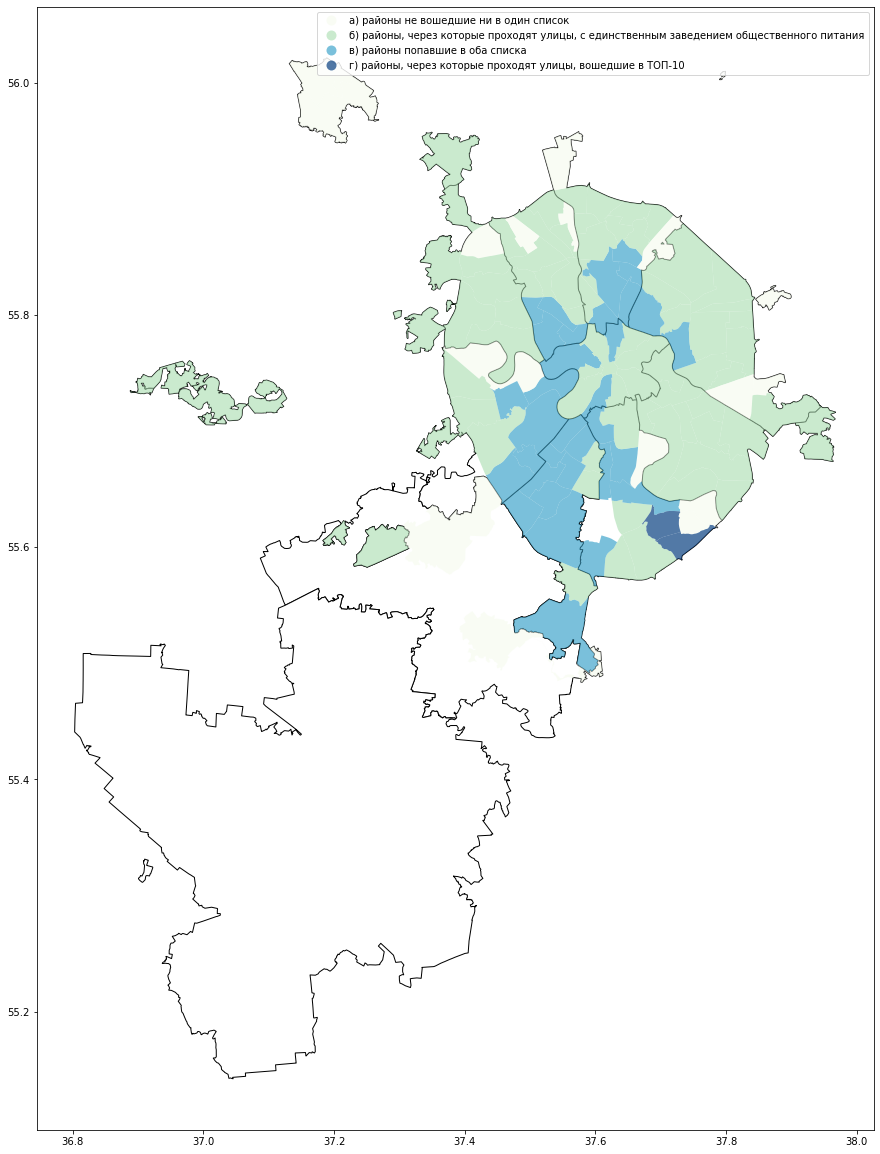

In [51]:
base = boundary_L5.plot(color='white', edgecolor='black', alpha=1, figsize=(15,30))
boundary_L8.plot(ax=base, column = 'top_low', alpha=.7, linewidth=0, cmap='GnBu', legend=True, figsize=[15,30])

Темно-синем отмечены районы, через которые проходят улицы из ТОП-10. Зеленым отмечены районы, через которые проходят улицы, на которых есть только одно заведение общественного питания. Светло-стнем отмечены районы, через которые проходят как улицы, вошедшие в ТОП-10, так и улицы с всего одним объектом общественного питания. Бежевым отмечены районы, в которых нет улиц из ТОП-10 и нет улиц на которых всего один объект общественного питания. Так же на карту для удобства восприятия нанесины границы административных округов Москвы.

#### Проверка районов по другому источнику

В нашем распоряжении есть файл с базой данных улиц Москвы. Загрузим его в переменную `mos_streets`.

In [52]:
url='https://drive.google.com/file/d/1VDTg4uwh558OXxlGHsxCCNVxO9-7Ge7l/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
mos_streets = pd.read_csv(url)
mos_streets.head()

,street_name,areaid,okrug,area
0,Выставочный пере...,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитска...,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездник...,17,ЦАО,Пресненский район


Составим список районов и округов Москвы.

In [53]:
raions = mos_streets['area'].unique()
print(raions)
okrug = mos_streets['okrug'].unique()
print(okrug)

['Пресненский район' 'Таганский район' 'Тверской район' 'Район Арбат'
 'Район Замоскворечье' 'Район Богородское' 'Район Гольяново'
 'Басманный район' 'Район Измайлово' 'Район Косино-Ухтомский'
 'Район Метрогородок' 'Район Новогиреево' 'Район Новокосино'
 'Район Перово' 'Район Преображенское' 'Район Северное Измайлово'
 'Район Соколиная Гора' 'Район Вешняки' 'Район Восточное Измайлово'
 'Район Восточный' 'Район Ивановское' 'Район Сокольники'
 'Район Дорогомилово' 'Район Филевский Парк' 'Район Фили-Давыдково'
 'Район Крылатское' 'Район Кунцево' 'Можайский Район'
 'Район Ново-Переделкино' 'Район Очаково-Матвеевское'
 'Район Проспект Вернадского' 'Район Раменки' 'Район Солнцево'
 'Район Тропарево-Никулино' 'Район Внуково' 'Район Крюково'
 'Район Матушкино-Савелки' 'Панфиловский район' 'Район Аэропорт'
 'Район Беговой' 'Бескудниковский Район' 'Дмитровский район'
 'Головинский район' 'Хорошевский район' 'Район Ховрино' 'Район Коптево'
 'Район Левобережный' 'Молжаниновский район' 'Савеловский

Приведем колонку `street_name` к нижнему регистру.

In [54]:
mos_streets['street_name'] = mos_streets['street_name'].map(lambda x : x.lower())
mos_streets.columns = ['street', 'areaid', 'okrug', 'area']
mos_streets = mos_streets[['street', 'okrug', 'area']]
mos_streets.head()

,street,okrug,area
0,выставочный пере...,ЦАО,Пресненский район
1,улица гашека,ЦАО,Пресненский район
2,большая никитска...,ЦАО,Пресненский район
3,глубокий переулок,ЦАО,Пресненский район
4,большой гнездник...,ЦАО,Пресненский район


Выведем информацию об одной любой улице, например о Профсоюзной.

In [55]:
mos_streets[mos_streets['street']=='профсоюзная улица']

,street,okrug,area
3845,профсоюзная улица,ЮЗАО,Академический район
3867,профсоюзная улица,ЮЗАО,Район Черемушки
3916,профсоюзная улица,ЮЗАО,Район Ясенево
3948,профсоюзная улица,ЮЗАО,Район Коньково
3996,профсоюзная улица,ЮЗАО,Обручевский район
4024,профсоюзная улица,ЮЗАО,Район Теплый Стан


Как мы видим, зачастую одна улица попадает сразу в несколько районов. Соберем данные по одной улице в одну строку.

In [56]:
mos_streets = mos_streets.groupby('street').agg({'area': 'unique', 'okrug': 'unique'})
mos_streets = mos_streets.reset_index(drop=False)
mos_streets.head(10)

,street,area,okrug
0,1-й автозаводски...,[Даниловский район],[ЮАО]
1,1-й амбулаторный...,[Район Аэропорт],[САО]
2,1-й архивный пер...,[Район Хамовники],[ЦАО]
3,1-й бабьегородск...,[Район Якиманка],[ЦАО]
4,1-й балтийский п...,[Район Аэропорт],[САО]
5,1-й басманный пе...,[Басманный район...,[ЦАО]
6,1-й белокаменный...,[Район Богородское],[ВАО]
7,1-й богучарский ...,[Район Южное Бут...,[ЮЗАО]
8,1-й ботанический...,[Район Свиблово],[СВАО]
9,1-й боткинский п...,[Район Беговой],[САО]


Добавим в таблицу с заведениями информацию об округе и районе. Чтобы `merge()` сработал, названия должны в точности совпадать, удалим пробелы из названий улиц, чтобы избежать проблем с появлением лишних пробелов в названиях и объединим таблицы.

In [57]:
def street_without(raw):
    return raw['street'].replace(' ', '')
df['street_new'] = df.apply(street_without, axis=1)
mos_streets['street_new'] = mos_streets.apply(street_without, axis=1)
df = df.merge(mos_streets, on='street_new', how='left')
df.head()

,id,object_name,chain,object_type,address,number,type,street_x,street_new,street_y,area,okrug
0,151635,СМЕТАНА,нет,кафе,улица егора аба...,48,улица,улица егора аба...,улицаегораабакумова,улица егора абак...,[Ярославский Район],[СВАО]
1,77874,Родник,нет,кафе,улица талалихин...,35,улица,улица талалихина,улицаталалихина,улица талалихина,[Таганский район...,"[ЦАО, ЮВАО, ЮЗАО]"
2,24309,Кафе «Академия»,нет,кафе,абельмановская ...,95,улица,абельмановская ...,абельмановскаяулица,абельмановская у...,[Таганский район],[ЦАО]
3,21894,ПИЦЦЕТОРИЯ,да,кафе,абрамцевская ул...,40,улица,абрамцевская улица,абрамцевскаяулица,абрамцевская улица,[Район Лианозово],[СВАО]
4,119365,Кафе «Вишневая м...,нет,кафе,абрамцевская ул...,50,улица,абрамцевская улица,абрамцевскаяулица,абрамцевская улица,[Район Лианозово],[СВАО]


Соберем сводную таблицу по улицам и числу заведений на улице. Для этого сначала сделаем текстовыми поля 'area' и 'okrug', т.к. там могут встречаться пустые списки, которые помешают группировке. Затем вернем формат списка.

In [58]:
df['area'] = df['area'].astype(str)
df['okrug'] = df['okrug'].astype(str)

In [59]:
df_street_pivot = df.groupby('street_x').agg({'id': 'count', 'area': 'unique', 'okrug': 'unique'})
df_street_pivot = df_street_pivot.reset_index(drop=False)
df_street_pivot.columns = ['street', 'number_establishments', 'area', 'okrug']
df_street_pivot = df_street_pivot.sort_values(by='number_establishments', ascending=False)
def area_list(raw):
    text_area = str(raw['area'])
    area = []
    for area_m in raions:
        if text_area.find(area_m) != -1:
            area.append(area_m)
    return area
def okrug_list(raw):
    text = str(raw['okrug'])
    okrugs = []
    for okrug_m in okrug:
        if text.find(okrug_m) != -1:
            okrugs.append(okrug_m)
    return okrugs
df_street_pivot['area'] = df_street_pivot.apply(area_list, axis=1)
df_street_pivot['okrug'] = df_street_pivot.apply(okrug_list, axis=1)
top10_streets = df_street_pivot.head(10)
top10_streets

,street,number_establishments,area,okrug
1028,проспект мира,204,[Алексеевский ра...,"[ЦАО, ВАО, СВАО]"
1032,профсоюзная улица,181,[Академический р...,"[ЗАО, ЮЗАО]"
674,ленинградский п...,170,"[Район Аэропорт,...",[САО]
989,пресненская наб...,167,[Пресненский район],[ЦАО]
397,варшавское шоссе,161,[Район Чертаново...,"[ЗАО, ЮАО, ЮЗАО]"
677,ленинский проспект,147,[Район Проспект ...,"[ЦАО, ЗАО, ЮАО, ..."
1025,проспект вернад...,128,[Район Проспект ...,"[ЗАО, ЮЗАО]"
665,кутузовский про...,114,[Район Дорогомил...,[ЗАО]
590,каширское шоссе,111,[Район Москвореч...,[ЮАО]
596,кировоградская ...,108,[Район Чертаново...,[ЮАО]


Построим график.

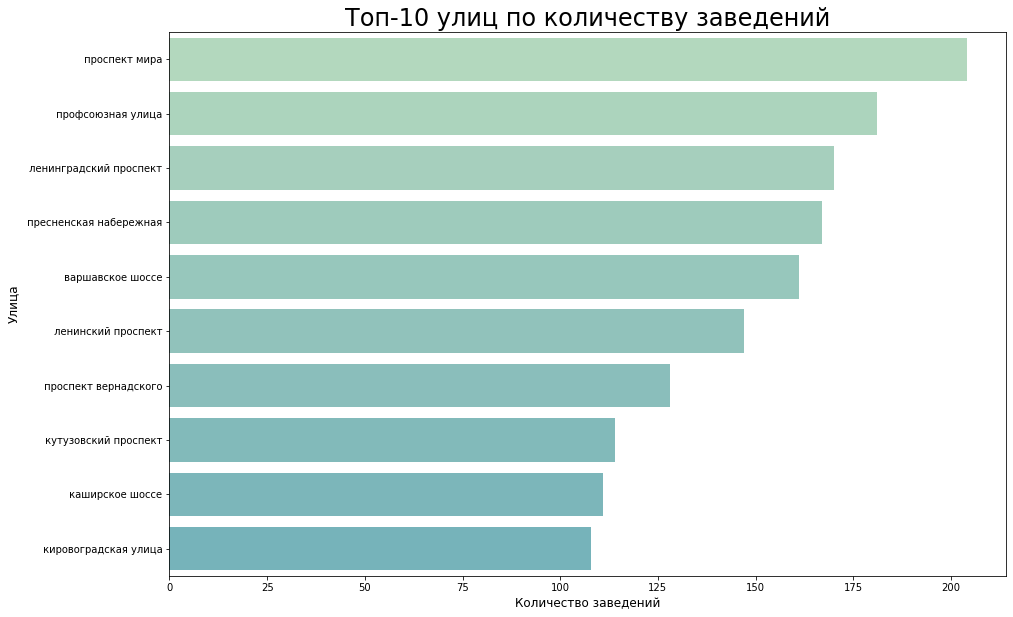

In [60]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.set_palette('GnBu_d', 30)
sns.barplot(ax = ax, x = 'number_establishments', y = 'street', data = df_street_pivot.head(10))
ax.set_xlabel('Количество заведений', size = 12 )
ax.set_ylabel('Улица' , size = 12 )
ax.set_title('Топ-10 улиц по количеству заведений', size = 24 )
plt.show()

Построим таблицу частоты попадания района в топ-10.

In [61]:
area = []
number_establishments = []
def area_number(raw):
    area.extend(raw['area'])
    for i in raw['area']:
        number_establishments.append(raw['number_establishments'])
top10_streets.apply(area_number, axis=1)
data = {'area':area, 'number_establishments':number_establishments} 
area_info = pd.DataFrame(data)
area_info = area_info.groupby('area').agg({'number_establishments': 'sum'})
area_info = area_info.reset_index(drop=False)
area_info = area_info.sort_values(by='number_establishments', ascending=False)
area_info

,area,number_establishments
25,Район Теплый Стан,328
6,Обручевский район,328
2,Донской район,308
19,Район Проспект В...,275
3,Ломоносовский район,275
26,Район Тропарево-...,275
11,Район Гагаринский,275
16,Район Нагатино-С...,272
30,Район Чертаново ...,269
29,Район Чертаново ...,269


Теперь построим таблицу частоты попадания округа в топ-10.

In [62]:
okrug = []
number_establishments = []
def okrug_number(raw):
    okrug.extend(raw['okrug'])
    for i in raw['okrug']:
        number_establishments.append(raw['number_establishments'])
top10_streets.apply(okrug_number, axis=1)
data = {'okrug':okrug, 'number_establishments':number_establishments} 
okrug_info = pd.DataFrame(data)
okrug_info = okrug_info.groupby('okrug').agg({'number_establishments': 'sum'})
okrug_info = okrug_info.reset_index(drop=False)
okrug_info = okrug_info.sort_values(by='number_establishments', ascending=False)
okrug_info

,okrug,number_establishments
1,ЗАО,731
6,ЮЗАО,617
5,ЮАО,527
4,ЦАО,518
0,ВАО,204
3,СВАО,204
2,САО,170


По получившимся таблицам сразу  видно в каких районах и округах Москвы расположены улицы из топ-10. Теперь найдем улицы на которых расположено только одно заведение и посчитаем их.

In [63]:
print('Число улиц одним объектом общественного питания',
      len(df_street_pivot[df_street_pivot['number_establishments']==1]['street']))

Число улиц одним объектом общественного питания 646


Составим уникальный  список районов и округов, в которые попали эти улицы, указанием количества заведений попавших на улицы этих районов и округов.

In [64]:
streets_one = df_street_pivot[df_street_pivot['number_establishments']==1]
area = []
number_establishments = []
streets_one.apply(area_number, axis=1)
data = {'area':area, 'number_establishments':number_establishments} 
area_info = pd.DataFrame(data)
area_info = area_info.groupby('area').agg({'number_establishments': 'sum'})
area_info = area_info.reset_index(drop=False)
area_info = area_info.sort_values(by='number_establishments', ascending=False)
area_info

,area,number_establishments
103,Таганский район,32
78,Район Сокол,31
88,Район Хамовники,28
4,Басманный район,26
104,Тверской район,25
22,Пресненский район,24
23,Район Арбат,19
55,Район Марьина роща,18
15,Мещанский район,18
37,Район Замоскворечье,15


In [65]:
okrug = []
number_establishments = []
streets_one.apply(okrug_number, axis=1)
data = {'okrug':okrug, 'number_establishments':number_establishments} 
okrug_info = pd.DataFrame(data)
okrug_info = okrug_info.groupby('okrug').agg({'number_establishments': 'sum'})
okrug_info = okrug_info.reset_index(drop=False)
okrug_info = okrug_info.sort_values(by='number_establishments', ascending=False)
okrug_info

,okrug,number_establishments
6,ЦАО,192
0,ВАО,188
1,ЗАО,104
4,СВАО,69
8,ЮВАО,54
3,САО,51
7,ЮАО,36
9,ЮЗАО,32
5,СЗАО,29
2,Зеленоград,3


В таблицах видно в каких округах и районах расположено больше всего улиц, на которых расположено только одно заведение. Можно сделать вывод, что самый популярные округа по количеству заведений на одной улице - это ЗАО, ЮЗАО, ЮАО, ЦАО. На них много улиц, вошедших в ТОП-10 и мало улиц, на которых всего одно заведение. Видимо эти округа самые благоприятные для общественных заведений. Рекомендую выбрать для ресторана один из них. Можно выбрать улицу из списка улиц с одним заведением, чтобы избежать лишней конкуренции.

## Заключение

Мы провели анализ заведений общественного питания и их расположения. Количество кафе сильно превышает количество остальных заведений. Также в Москве много столовых, ресторанов, предприятий быстрого обслуживания. Меньше всего магазинов с отделами кулинарии, закусочных и кафетериев. Несетевых заведений значительно больше. Более 80% заведений несетевые, менее 20% заведений сетевые. Наибольшая доля сетевых заведений приходится на предприятия быстрого обслуживания. Меньше всего сетевых заведений среди столовых. Ситуация, когда в сети много заведений с маленьким количеством мест более типична, чем малое количество заведений с большим количеством мест. В среднем больше всего посадочных мест бывает в столовых, меньше всего в магазинах с отделом кулинария. 
В топ-10 улиц вошли:

* проспект Мира	- проходит по территории районов Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино;
* Профсоюзная улица	- проходит по территории районов Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево;
* Ленинградский проспект - проходит по территории районов Беговой, Аэропорт, Сокол, Хорошёвский;
* Пресненская набережная - район 	Пресненский;
* Варшавское шоссе	- проходит по территории районов Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, Северное Бутово, Южное Бутово;
* Ленинский проспект - проходит по территории районов Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино;
* проспект Вернадского	- проходит по территории районов Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино;
* Кутузовский проспект	- проходит по территории районов Дорогомилово, Фили-Давыдково;
* Каширское шоссе	- проходит по территории районов Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники;
* Кировоградская улица	- проходит по территории районов Чертаново Северное, Чертаново Центральное и Чертаново Южное.

Округа Москвы, на которых находятся улицы, вошедшие в ТОП-10:

* ЗАО	
* ЮЗАО	
* ЮАО	
* ЦАО	
* ВАО	
* СВАО	
* САО	

Количество улиц в Москве, на которых расположено всего одно заведение общественного питания - 646. Мы так же подготовили список районов, через которые проходят эти улицы, и список округов.

Можно сделать вывод, что самый популярные округа по количеству заведений на одной улице - это ЗАО, ЮЗАО, ЮАО, ЦАО. На них много улиц, вошедших в ТОП-10 и мало улиц, на которых всего одно заведение. Видимо эти округа самые благоприятные для общественных заведений. Рекомендую выбрать для ресторана один из них. Можно выбрать улицу из списка улиц с одним заведением, чтобы избежать лишней конкуренции.

## Ссылка на презентацию

https://drive.google.com/file/d/1bHIYs7gNVSUBAg0IqNKz58GVPRPKOfsf/view?usp=sharing